# <img src="https://img.icons8.com/external-flaticons-lineal-color-flat-icons/64/000000/external-image-analysis-big-data-flaticons-lineal-color-flat-icons-2.png" style="height:50px;display:inline"/> EE 046200 - Technion - Image Processing and Analysis
----

# Computer Homework 2
---
### <span style="color:red"> Due Date: 12.06.25 </span>

## <img src="https://img.icons8.com/clouds/100/000000/upload.png" style="height:50px;display:inline" /> Submission guidelines
---

### READ THIS CAREFULLY

*	**Please notice:** Some of the exercises contain questions on topics that are yet to be taught in the lecture or the frontal exercises. You may consider them as background or preparation questions to the topic before learning about it in class, or you may wait until the topic is taught, and solve only the questions on the topics you already learned.
*	**Avoid unethical behavior.** This includes plagiarism, not giving credit to source code you decide to use, and false reporting of results. Consulting with friends is allowed and even recommended, but you must write the code on your own, independently of others. The staff will treat unethical behavior with the utmost severity. **!אנא המנעו מהתנהגות שאינה אתית והעתקות**
*	Code submission in **Python only**.
    You can choose your working environment:
    * You can work in a Jupyter Notebook , locally with <a href="https://www.anaconda.com/distribution/">Anaconda</a> (the course's computer HW will not require a GPU).
    * You can work in a Python IDE such as <a href="https://www.jetbrains.com/pycharm/">PyCharm</a> or <a href="https://code.visualstudio.com/">Visual Studio Code</a>. Both also allow opening/editing Jupyter Notebooks.
*	The exercise must be submitted **IN PAIRS** (unless the computer homework grader approved differently) until **<span style="color:red"> Thursday 12.06.2025 at 23:55</span>**.
*	The exercise will be submitted via Moodle in the following form:
    You should submit two **separated** files:
    * A report file (visualizations, discussing the results and answering the questions) in a `.pdf` format, with the name `hw2_id1_id2.pdf` where `id1`,`id2` are the ID numbers of the submitting students.
        * Be precise, we expect on point answers. But don't be afraid to explain you statements (actually, we expect you to).
        * Even if the instructions says "Show/Display...", you still need to explain what are you showing and what can be seen.
        * No other file-types ( `.docx` , `.html` , ...) will be accepted
    * A compressed `.zip` file, with the name: `hw2_id1_id2.zip` which contains:
        * A folder named `code` with all the code files inside ( `.py` or `.ipynb` ONLY!)
            *	The code should be reasonably documented, especially in places where non-trivial actions are performed.
            *	Make sure to give a suitable title (informative and accurate) to each image or graph, and also to the axes. Ensure that graphs and images are displayed in a sufficient size to understand their content (and maintain the relationship between the axes - do not distort them).
        * A folder named `my_data`, with all the files required for the code to run (your own images/videos). make sure to refer to your input files in the code locally. i.e. (if the code is in 'code' directory, and the input file is in a parallel 'my_data' directory:
            `img = cv2.imread('../my_data/my_img.jpg')`
        * **DO NOT** include the given input data in the zip. The code should refer to the given input data as it is located in a folder named `given_data`. i.e.:
            `img = cv2.imread('../given_data/given_img.jpg')`
*	If you submit your solution after the deadline, 4 points will be reduced automatically for each of the days that have passed since the submission date (unless you have approved it with the course staff before the submission date). Late submission will be done directly to the computer homework grader via mail, and not via Moodle.
*	Several Python, numpy, openCV reference files are attached in the Moodle website, and you can of course also use the Internet's help.
*	Questions about the **computer** exercise can be directed to the computer homework grader through the relevant Moodle forum or by email **and not during the workshop hours**.


## <img src="https://img.icons8.com/bubbles/50/000000/checklist.png" style="height:50px;display:inline"> General Notes:
---
### The ‘imshow’ function:
Full name: `matplotlib.axes.Axes.imshow`

The ‘imshow’ function is used to display images. The function expects to get a matrix whose members are in "discrete" `unit8` format (in the range [0,255]) or in "continuous" `float` format (in the range [0,1]). the dynamic range is determined by the format. These formats are acceptable for images. 


In [1]:
# imports for the HW
import numpy as np
import matplotlib.pyplot as plt
import cv2

## <img src="https://img.icons8.com/doodle/48/000000/puzzle.png" style="height:50px;display:inline"/> Part 1 - Solving a Puzzle 
---
In this part we will learn how to solve a 5-piece puzzle. You will be adding and "stitching" different images into a single big image. In order to do so, you will implement template matching using the correlation method (according to the principles presented in class).

During this part, we will use an image taken from "Where's Wally", and we will also try to find him!

**Report your results for each subsection. Explain successes and failures.**

### 1.a - Find The Location of High Correlation:
To create the puzzle image with good stitching between two images, we have to find similar regions of interest between the images. In order to achieve this, we use the Correlation Index (convolution without the kernel mirroring). The Correlation Index is defined for one-dimensional signals $f[n],g[n]$ as:
$$ (f\star g)[n] =\sum_{m=-\infty}^{\infty} f[m]g[m+n]$$
This means, it is the same as convolution, but without the mirroring.

Implement the `match_corr` function. 

The function accepts as inputs:
1. 2D numpy array `corr_obj` containing an image of a certain component (e.g., an apple tree). 
1. 2D numpy array `img`, which must have equal or larger height and width compared to `corr_obj`. The `img` input is an image that contains the component from `corr_obj` (e.g. - an image of a graden with the same apple tree in it). 

The function performs 2D correlation between the input arrays and return the location (indices) of `corr_obj`'s center using the coordinates of `img`.

For example, given the following `corr_obj` (left) and `img` (right):

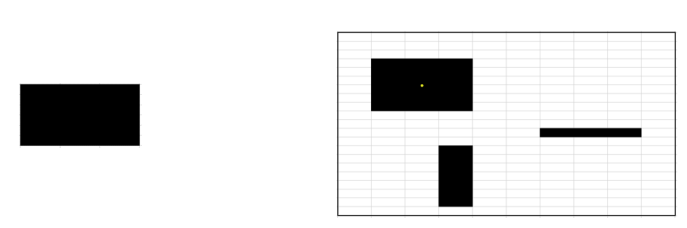

The output of the function is the 2D coordinates of the yellow dot in `img`.

In [2]:
def match_corr(corr_obj, img):
    """
    return the center coordinates of the location of 'corr_obj' in 'img'.
    :param corr_obj: 2D numpy array of size [H_obj x W_obj] 
                     containing an image of a component.
    :param img: 2D numpy array of size [H_img x W_img] 
                where H_img >= H_obj and W_img>=W_obj, 
                containing an image with the 'corr_obj' component in it.
    :return:
        match_coord: the two center coordinates in 'img' 
                     of the 'corr_obj' component.
    """
    # ====== YOUR CODE: ======
    #normalize the objects
    norm_obj = (corr_obj - np.mean(corr_obj)) / (np.std(corr_obj) )
    norm_img = (img - np.mean(img)) / (np.std(img))
    #calc the correlation using filter2D
    corr_map = cv2.filter2D(norm_img, ddepth=-1, kernel=norm_obj, borderType=cv2.BORDER_CONSTANT)
    
    #extract x y and center them
    y, x = np.unravel_index(np.argmax(corr_map), corr_map.shape)
    match_coord = (y, x)
    # ========================
    
    return match_coord


**Notes:**
* Use the `cv2.filter2D` method to perform the correlation.
* Note that the output image is the same size as the input image. Be sure to choose `borderType=cv2.BORDER_CONSTANT` to pad the source image with zeros (similar to 'same' convolution).
* Notice that you should normalize the object and the image.

### 1.b - Pre-Processing:

Load `Where's_Wally.jpg`. 

Transform it to grayscale.

Given that the grayscale image has a size of $H\times W$, crop the grayscale image leaving only the middle part of it (80% of the original image height $H$ and width $W$) as follows:
1. Crop $0.1H$ from the top side of the grayscale image.
2. Crop $0.1H$ from the bottom side of the grayscale image.
3. Crop $0.1W$ from the left side of the grayscale image.
4. Crop $0.1W$ from the right side of the grayscale image.

Sanity check: the cropped grayscale image should be of size $0.8H\times 0.8W$.

Create a new `np.zeros` array. Make the zeros array the same size as the original grayscale image. 

Add the cropped grayscale image to the zeros array, placing it in the middle. 

Display the original grayscale image and the cropped Image (with its black frame).

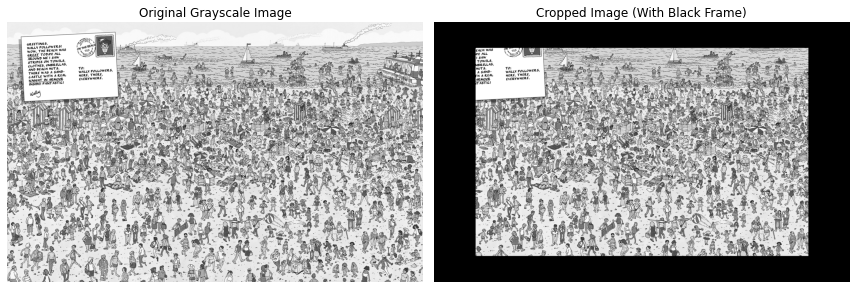

In [3]:
    # ====== YOUR CODE: ======
    #load and change to gray
wally = cv2.imread("../given_data/Where's_Wally.jpg")
wally_gray = cv2.cvtColor(wally, cv2.COLOR_BGR2GRAY)
H, W = wally_gray.shape
#get indices
top = int(0.1 * H)
bottom = int(0.9 * H)
left = int(0.1 * W)
right = int(0.9 * W)

#crop and add black frame
wally_crop = wally_gray[top:bottom, left:right]

wally_crop_black =  np.zeros_like(wally_gray)
wally_crop_black[top:bottom, left:right] = wally_crop

#plot
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.title("Original Grayscale Image")
plt.imshow(wally_gray, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Cropped Image (With Black Frame)")
plt.imshow(wally_crop_black, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
    # ========================

### 1.c - Frames matching and Puzzle solving
Use the four pieces you have in `given_data`, and load them.

Apply the `match_corr` function four times, once for every piece.
Find the indices where you should place every piece of the puzzle.

Display the whole image after inserting each puzzle piece. Set the titles to be the respective output coordinates of the `match_corr` function.

Note: you might need to crop your puzzle pieces to fit in depending on how well you implemented `match_corr`.


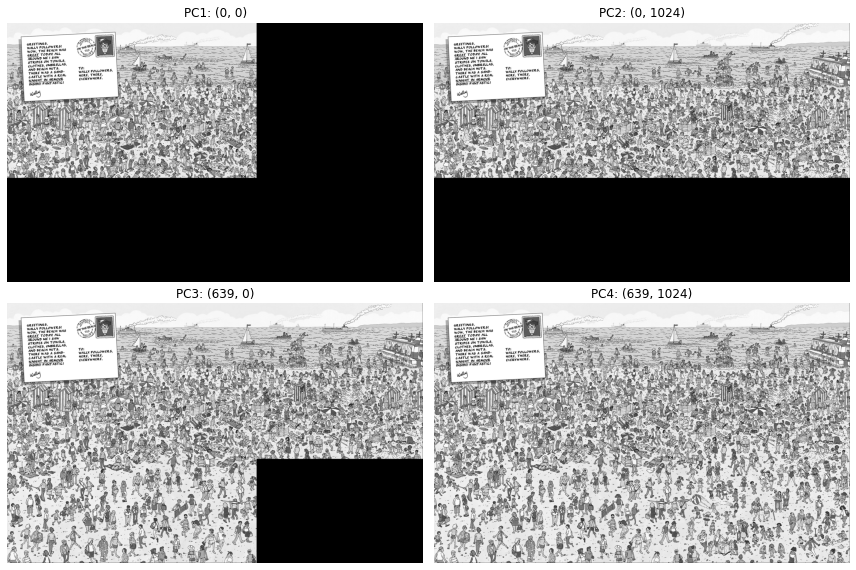

In [4]:
#load pieces
PC1 = cv2.imread('../given_data/PC1.jpg', cv2.IMREAD_GRAYSCALE)
PC2 = cv2.imread('../given_data/PC2.jpg', cv2.IMREAD_GRAYSCALE)
PC3 = cv2.imread('../given_data/PC3.jpg', cv2.IMREAD_GRAYSCALE)
PC4 = cv2.imread('../given_data/PC4.jpg', cv2.IMREAD_GRAYSCALE)

pieces = [(PC1, "PC1"), (PC2, "PC2"), (PC3, "PC3"), (PC4, "PC4")]

#init empty image to place pieces onto
wally_parts = np.zeros_like(wally_gray)
plt.figure(figsize=(12, 8))
for i, (piece, name) in enumerate(pieces):
    match_y, match_x = match_corr(piece, wally_gray)
    h, w = piece.shape
    #correct to top left
    match_y = int(match_y) - h // 2
    match_x = int(match_x) - w // 2

    # add piece to correct spot
    wally_parts[match_y : match_y + h, match_x : match_x + w ] = piece

    # print updated image
    plt.subplot(2, 2, i + 1)
    plt.imshow(wally_parts, cmap='gray')
    plt.title(f"{name}: ({match_y}, {match_x})")
    plt.axis('off')

plt.tight_layout()
plt.show()

### 1.d - Finding Wally!

Now that we have the big stitched image, we can finally try to find Wally (You can try first on your own, but it's a hard one).

Load `Wally.jpg` Image from given data, convert the image to grayscale and display it.

Find him using the `match_corr` function you implemented. Now you got Wally's center image coordinates.

**Plot** a black circle around Wally's center. Make sure the circle's radius is sufficient so that Wally is visible.


Hints for plotting the circle: think about a circle equation, with a given radius, and blacken all the pixels which have coordinates that satisfy this equation (you may use a certain tolerance to the chosen radius). You can also look for built-in `matplotlib` circle functions.

**Mention in your report what method you used and which radius you chose.**

Display the image with the circle around Wally (note that you need to convert it to RGB first). 

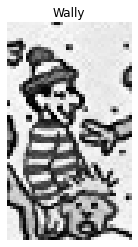

Wally found at: (1120, 1785)


In [5]:
    # ====== YOUR CODE: ======
wally_face = cv2.imread("../given_data/Wally.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(wally_face, cmap='gray')
plt.title("Wally")
plt.axis('off')
plt.show()

wally_center_y, wally_center_x = match_corr(wally_face, wally_parts)
print(f"Wally found at: ({wally_center_y}, {wally_center_x})")
    # ========================

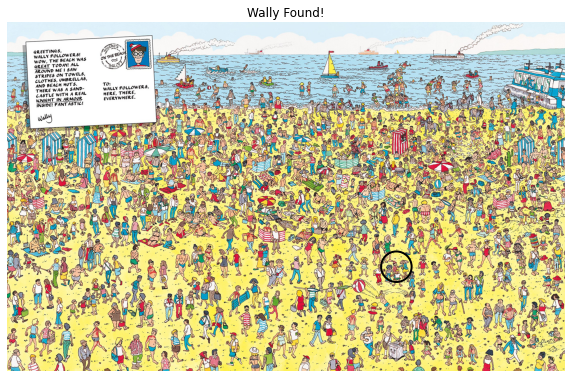

In [6]:
import matplotlib.patches as patches

# convert to RGB 
wally_rgb = cv2.cvtColor(wally, cv2.COLOR_BGR2RGB)

# plot and add circle
fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(wally_rgb)

# draw
radius = max(wally_face.shape)
circle = patches.Circle((wally_center_x , wally_center_y ), radius, edgecolor='black', facecolor='none', linewidth=2)
ax.add_patch(circle)

plt.title("Wally Found!")
plt.axis('off')
plt.show()

## <img src="https://img.icons8.com/?size=100&id=UcMpFREbKKmb&format=png&color=000000" style="height:50px;display:inline"/> Part 2 - Spatial Filtering and Morphological Operations
---
In This part we would like to examine a fun use of the morphological operations and spatial filters.

We will use a Minesweeper game board image to extract an image containing only the mines' locations.

If you want to take a break, that's fine. Here's a link to the game:
https://g.co/kgs/38t3q1w

You are encouraged to read the following openCV tutorial about morphological operations <br>
https://docs.opencv.org/3.4/d9/d61/tutorial_py_morphological_ops.html


### 2.a - Morphological operations
1. Load and display the image `mines.jpg` in grayscale.
1. Create two morphological kernels: 
    1. A vertical line, 3 pixels long.
    1. A horizontal line, 3 pixels long.
1. Apply erosion on the grayscale image using each of the kernels **separately** and display the two resulting images.
   What are the geometrical structures being preserved in each of the resulting images?
1. Sum the two images from the above section and display the summation image. Choose a threshold of `0.4*255` and transform the image to be binary - containing only `0` and `255` pixels. Display the result.


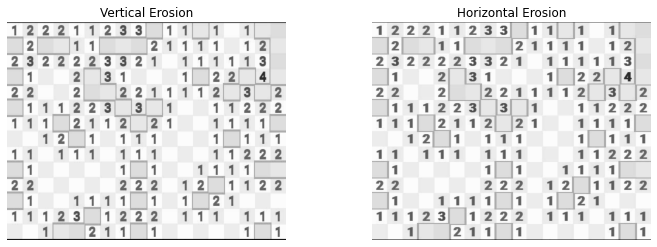

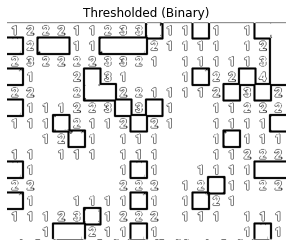

In [7]:
    # ====== YOUR CODE: ======
    #load mines
mines = cv2.imread('../given_data/mines.jpg', cv2.IMREAD_GRAYSCALE)
#init kernels
kernel_v = np.ones((3, 1), np.uint8)
kernel_h = np.ones((1, 3), np.uint8)
#erode the image
eroded_v = cv2.erode(mines, kernel_v)
eroded_h = cv2.erode(mines, kernel_h)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1);
plt.title("Vertical Erosion");
plt.imshow(eroded_v, cmap='gray');
plt.axis('off')
plt.subplot(1, 2, 2);
plt.title("Horizontal Erosion");
plt.imshow(eroded_h, cmap='gray');
plt.axis('off')
plt.show()

# sum eroded images
summed = eroded_v + eroded_h

# threshold at 0.4 * 255
mines_bin = summed > 0.4*255

# binary result
plt.figure(figsize=(12, 4))
plt.imshow(mines_bin, cmap='gray')
plt.title("Thresholded (Binary)")
plt.axis('off')
plt.show()

    # ========================

### 2.b - Median filtering
At this point we would like to use a median filter to isolate the mines locations.

The mines locations are the connected components that contains grass, and a mine is hiding below. 

Perform a logical inversion (`NOT`) on the image from section 2.a. 

Apply a median filter using a `3x3` kernel and the `cv2.medianBlur` function. Explain why a median filter is appropriate (i.e., why did we not choose a mean filter)?

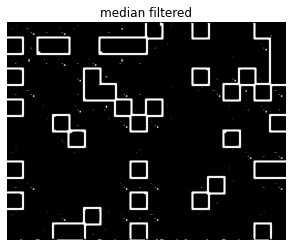

In [8]:
    # ====== YOUR CODE: ======

# invert the binary image
mines_bin_uint8 = (mines_bin.astype(np.uint8)) * 255
mines_bin_i = cv2.bitwise_not(mines_bin_uint8)


# median filter
bin_median = cv2.medianBlur(mines_bin_i, 3)

plt.figure(figsize=(12, 4))
plt.imshow(bin_median, cmap='gray')
plt.title("median filtered")
plt.axis('off')
plt.show()
    # ========================

### 2.c - Back to morphological operations
Now, we want to refine the mines' placement better since it is possible that the connection image from section 2.b also contains the edges of the mines' squares.

Create a third squared kernel, with a size of 2x2 and apply erosion to the image from section 2.b using it. Present the result obtained.

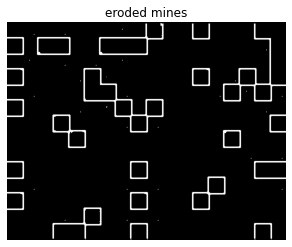

In [9]:
    # ====== YOUR CODE: ======
    
kernel_2 = np.ones((2, 2), np.uint8)

#erode the image
eroded_2 = cv2.erode(bin_median, kernel_2)

plt.figure(figsize=(12, 4))
plt.imshow(eroded_2, cmap='gray')
plt.title("eroded mines")
plt.axis('off')
plt.show()
    # ========================

### 2.d - Image sharpening and final thresholding
1. Perform an intersection between the result image from 2.c and the original image (e.g., by converting the binary image to `0,1` values and multiplying the images element-wise). Note: this multiplication is defined only for two arrays with the same type, so make sure both images are of `uint8` type.
1. Sharpen the image by filtering it using the filter kernel $K$ and the openCV function `cv2.filter2D` where:
$$K=\begin{bmatrix}
0 & -1 & 0\\
-1 & 5 & -1\\
0 & -1 & 0
\end{bmatrix}$$
**Display** the sharpened result. Why does this filter make the image sharper?
* Note that `cv2.filter2D` performs correlation and not convolution, but in our case is doesn't matter because $K$ is symmetric.

3. Finally, to remove the unnecessary background, choose a threshold value that gives a good result in your opinion and transform the image to be binary. 

**Display** the final binary result and specify the chosen threshold in the title. 

Did you succeed in creating an image that contains only the mines' locations? Are there any problems in the final result? Explain.

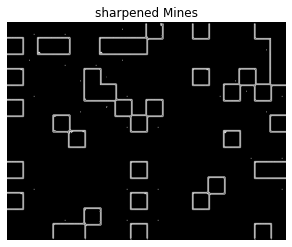

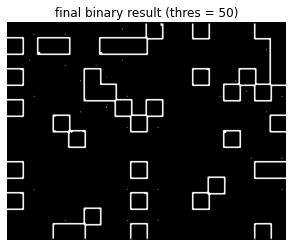

In [10]:
    # ====== YOUR CODE: ======
mask = (eroded_2 > 0).astype(np.uint8)

#  multiplication to leave onlt mines
masked_img = cv2.multiply(mines, mask)

# kernel
K = np.array([[0, -1, 0],
              [-1, 5, -1],
              [0, -1, 0]], dtype=np.float32)

# sharpen with K
sharpened = cv2.filter2D(masked_img, -1, K)

# sharp image print
plt.imshow(sharpened, cmap='gray')
plt.title("sharpened Mines")
plt.axis('off')
plt.show()

# bin sharp img
thres = 50
binary_final = sharpened > thres
# print final
plt.imshow(binary_final, cmap='gray')
plt.title(f"final binary result (thres = {thres})")
plt.axis('off')
plt.show()

    # ========================

### Part 3- Universal Huffman Coding 
## A — Theory

You are given a set of $K$ grayscale images, each represented by a probability mass distribution (PMF) $p^{(k)}(x)$ over pixel values $x \in \{0, 1, ..., 255\}$. Each distribution is selected with probability $\pi_k$ (assume uniform prior unless stated otherwise). You are to design a **single Huffman code** that performs well on average.

Use the following definitions:

- **Entropy**: $H(p) = -\sum_x p(x) \log_2 p(x)$  
- **KL divergence**: $D(p \| q) = \sum_x p(x) \log_2 \left( \frac{p(x)}{q(x)} \right)$

The KL Divergence is a measure of the similarity between two probability distriubtions. It holds that
$$
D(p\|q) = 0 \iff p(x)=q(x) \text{ } \forall x
$$

Answer the following: 

answered in attached pdf  

---

### 1. Mixture Distribution

**a.** Define formally the mixture distribution $\bar{p}(x)$ from the set $\{p^{(k)}\}$ and $\{\pi_k\}$. We define $\bar{p}$ as the probability to draw a gray level $x$ out of all the possible images (instead of one). The probability to select an image is given by the prior $\{\pi_k\}$.


**b.** Prove that $\bar{p}$ is a valid probability distribution.

answered in attached pdf 

---

### 2. Expected Code Length

Let $\ell(x)$ be the bit length assigned to symbol $x$ in a prefix-free code.

**a.** Given the image $I^{(k)}$ what is the minimal expected length of a symbol coded for this image?  
**b.** Let $\ell(x)$ be the number of bits assigned to symbol $x$ in a **universal prefix-free code** that is constructed **once** using the mixture distribution $\bar{p}$.

That is, the **same code** (same $\ell(x)$) is used for all images.

Prove that the overall expected code length across all images is:

$$
\mathbb{E}_{\pi_k}[L_k] = \sum_x \bar{p}(x) \cdot \ell(x)
$$

answered in attached pdf 

---

### 3. Bounding Universal Code Length (Explanation - No need to solve)

Given **a single Huffman code** based on the average (mixture) distribution  $\bar{p}$, let $l(x)$ denote the code length of each fray-level $x$ of this Huffman code.
The expected number of bits to encode a sample from $p^{(k)}(x)$ is bounded by:


$$
\mathbb{E}_{x\sim p^{(k)}}[l(x)] < H(p^{(k)}) + D(p^{(k)} \| \bar{p}) + 1
$$

(This result is derived from information theory)


Let’s break it down:

- **$H(p^{(k)})$** is the best-case number of bits per symbol — if we had a Huffman code tailored exactly for $p^{(k)}$.
- **$D(p^{(k)} \| \bar{p})$** is the **"penalty"** we pay for using a mismatched distribution. If $p^{(k)}$ is very different from $\bar{p}$, this term is large.
- The **extra $+1$** is a technical upper bound that comes from the worst-case difference between Huffman code length and ideal code length.

This result is very reassuring (if all the images are close to one another in the KL divergence sense):  
> Even though we are using the **same Huffman code** for all images, the expected number of bits we use for *any* image $k$ is **within 1 bit + KL divergence** of optimal.

---




## B — Implementation and Analysis (Universal Huffman Coding)

In this part, you will **build a complete Huffman compression pipeline**, apply it to a dataset of grayscale images, and test the theory you've explored in Part A.

---
You will:

1. **Create a dataset** of 8 grayscale images (real) - code provided below.
2. **Compute the PMF** $p^{(k)}(x)$ of each image
3. **Build a Huffman code** for the average PMF $\bar{p}(x)$ (universal codebook)
4. For each image:
   - Compute **KL divergence** comparing $p^{(k)}(x)$ to the average PMF $\bar{p}(x)$.
   - Compute **average code length** under the universal Huffman code: $\mathbb{E}_{x\sim p^{(k)}}[l(x)]$.
5. **Visualize** the trade-off between divergence and compression performance


---

### **Step 1: Create a Dataset**

We provide the code to create a dataset of several gray scale images, they will be used as the PMFs in the exercise.

---

### **Step 2: Compute PMFs**

For each image:

- Flatten it into a 1D NumPy array
- Count how often each pixel value (0–255) occurs
- Normalize the counts to get the **empirical PMF** $p^{(k)}(x)$

Store the PMFs for future use.

---

### **Step 3: Compute the Average PMF**

Compute:

$$
\bar{p}(x) = \frac{1}{K} \sum_{k=1}^K p^{(k)}(x)
$$

This is your **universal coding distribution**.

---

### **Step 4: Build a Huffman Code**

Use your own implementation of Huffman coding (here or in `huffman.py`) to build a codebook from the average PMF $\bar{p}$:
The process in short is as you learned in class. In order to build the code we need to have a dictionary of some sort that maps from possible elements to their frequencies. Then, you use those frequencies to build a binary tree, you start with an empty heap. Then each time you merge the two smallest frequencies and create a node to represent them. You keep doing it iteratively until having only one node in the heap. That will be the origin of the binary tree. Then you walk through the tre and create the codebook (a dictionary that maps each element to a binary string). To code an element you simply find its mapping in the codebook dictionary.
```python
codebook = build_huffman(pmf_dict)
```


---

### **Step 5: Analyze Each Image**

For each image:

- Compute its **average code length** under the universal code $\mathbb{E}_{x\sim p^{(k)}}[l(x)]$.
- Compute its **KL divergence** to the average PMF: $D(p^{(k)} \| \bar{p})$.

Save these values in a table.

---

### **Step 6: Plot the Results**

Create a scatter plot with:

- X-axis: $D(p^{(k)} \| \bar{p})$ (KL divergence)
- Y-axis: $\mathbb{E}_{p^{(k)}}[L_{\text{uni}}]$ (average code length under universal code)

You should observe a roughly linear trend.

---

### Step 1 — Code to Create Dataset (Just Copy and Use it)

```python
import os
import numpy as np
from PIL import Image
from skimage import data

# Create output directory
os.makedirs("data", exist_ok=True)

# Target size
target_size = (256, 256)

# Load skimage images
image_sources = {
    "camera": data.camera(),
    "coins": data.coins(),
    "moon": data.moon(),
    "page": data.page(),
    "text": data.text(),
    "clock": data.clock(),
    "chelsea_gray": data.chelsea()[..., 0],  # RGB -> use red channel
}

# Save all images as 256x256 grayscale PNGs
for name, arr in image_sources.items():
    img = Image.fromarray(arr).convert("L")  # Ensure grayscale
    img = img.resize(target_size, Image.Resampling.LANCZOS)
    img.save(f"data/{name}.png")

print("✅ Saved all images to ./data/")
```

---

After this step, you’ll have a set of normalized grayscale images you can use for analysis.
In the next cells write the solution to the questions (the code), use as many cells as you need.

In [11]:
#!pip install scikit-image

In [12]:
#!pip install --upgrade pillow

In [13]:
import os
import numpy as np
from PIL import Image
from skimage import data

# Create output directory
os.makedirs("../my_data", exist_ok=True)

# Target size
target_size = (256, 256)

# Load skimage images
image_sources = {
    "camera": data.camera(),
    "coins": data.coins(),
    "moon": data.moon(),
    "page": data.page(),
    "text": data.text(),
    "clock": data.clock(),
    "chelsea_gray": data.chelsea()[..., 0],  # RGB -> use red channel
}

# Save all images as 256x256 grayscale PNGs
for name, arr in image_sources.items():
    img = Image.fromarray(arr).convert("L")  # Ensure grayscale
    img = img.resize(target_size, Image.LANCZOS)# i deleted resample due to issues with library versiond
    img.save(f"../my_data/{name}.png")

print("✅ Saved all images to ../my_data")

✅ Saved all images to ../my_data


In [14]:
# Here is a high level overview of huffman_coding code (this is a recomendation, not a requirement):
import heapq

class Node:
    def __init__(self, symbol=None, freq=0, left=None, right=None):
        self.symbol = symbol
        self.freq = freq
        self.left = left
        self.right = right

    def __lt__(self, other):
        return self.freq < other.freq
    
def compute_frequencies(pmf_dict, total_count=100000):
    """ 
    Converts a probability mass function (PMF) dictionary to frequency counts suitable for building a Huffman tree.
    
    Args:
        pmf_dict (dict): A dictionary mapping symbols (e.g., pixel values 0-255) to probabilities.
        
    Returns:
        list of tuples: Each tuple is (symbol, frequency), where frequency is an integer proportional to its probability.
    """
    freqs = []
    for symbol, prob in pmf_dict.items():
        freq = max(1, int(prob * total_count))  # ensure freq > 0
        freqs.append((symbol, freq))
    return freqs
    #pass  # TODO: implement

def build_huffman_tree(frequencies):
    """
    Builds a Huffman tree from the given symbol frequencies using a priority queue.
    
    Args:
        frequencies (list of tuples): Each tuple is (symbol, frequency).
        
    Returns:
        Node: The root of the built Huffman tree.
    """
    
    heap = [Node(symbol=s, freq=f) for s, f in frequencies]
    heapq.heapify(heap)

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)
        merged = Node(freq=left.freq + right.freq, left=left, right=right)
        heapq.heappush(heap, merged)

    return heap[0]  # root

def generate_codebook(huffman_root):
    """
    Traverses the Huffman tree and assigns binary codes to each symbol.
    
    Args:
        huffman_root (HuffmanNode): The root of the Huffman tree.
        
    Returns:
        dict: A dictionary mapping symbols to binary string codes.
    """
    codebook = {}

    def traverse(node, prefix=""):
        if node.symbol is not None:
            codebook[node.symbol] = prefix
            return
        traverse(node.left, prefix + "0")
        traverse(node.right, prefix + "1")

    traverse(huffman_root)
    return codebook

def build_huffman(pmf_dict, total_count=100000):
    """
    High-level function that takes a PMF and returns a Huffman codebook.
    
    Args:
        pmf_dict (dict): A dictionary mapping symbols to probabilities.
    
    Returns:
        dict: A dictionary mapping each symbol to its Huffman code (binary string).
    """
    freqs = compute_frequencies(pmf_dict, total_count)
    root = build_huffman_tree(freqs)
    return generate_codebook(root)


In [15]:
#step 2 
names = ["camera", "coins", "moon", "page", "text", "clock", "chelsea_gray"]
images = []

for name in names:
    img = Image.open(f"../data/{name}.png")
    images.append(np.array(img))
def get_pmf(img):
    flat = img.flatten()
    hist = np.bincount(flat, minlength=256)
    return hist / hist.sum()

pmfs = [get_pmf(img) for img in images]

In [16]:
#step 3 calc mean pmf
p_avg = np.mean(pmfs, axis=0)
p_avg_dict = {i: p for i, p in enumerate(p_avg) if p > 0}
# step 4 build using our huffman
samples_per_image = 256 * 256
total_samples = samples_per_image * len(images)
codebook = build_huffman(p_avg_dict, total_samples)


In [17]:
#step 5
def kl(p, q):
    eps = 1e-12
    p = np.clip(p, eps, 1)
    q = np.clip(q, eps, 1)
    return np.sum(p * np.log2(p / q))

def entropy(p):
    eps = 1e-12
    p = np.clip(p, eps, 1)
    return -np.sum(p * np.log2(p))

def expected_len(pmf, cb):
    return sum(pmf[x] * len(cb[x]) for x in range(256) if x in cb)

results = []
for name, pmf in zip(names, pmfs):
    k = kl(pmf, p_avg)
    l = expected_len(pmf, codebook)
    h = entropy(pmf)
    results.append((name, k, l, h, l - h))
    # (name, KL, len, entropy, overhead) added entrophy for extra step not instructed


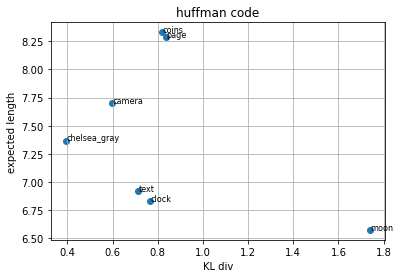

In [18]:
#step 6
kls = [r[1] for r in results]
lens = [r[2] for r in results]

plt.scatter(kls, lens)
for name, d, l, h, overhead in results:
    plt.text(d + 0.002, l, name, fontsize=8)

plt.xlabel("KL div")
plt.ylabel("expected length")
plt.title("huffman code")
plt.grid(True)
plt.show()


the result seems roughly linear but with a few very off point(moon especially), we opened the images to try to underdtand why and realized the images had varying levels of entrophy which would obviously impact the ability of the huffman algorithm to compress it, we looked online a bit and saw that we should subtract the entrophy from the expected length param, after doing so we got a much more linear plot which we think(and hope) was the point.

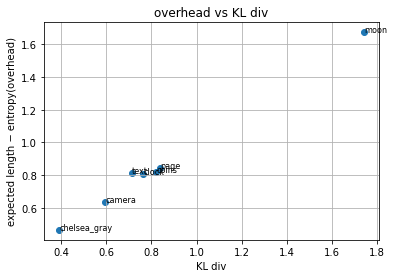

In [19]:
#bonus step? add entrophy cosideration? wasnt in instructions but makes sense to us, maybe we misunderstood
overheads = [r[4] for r in results]

plt.scatter(kls, overheads)
for name, d, l, h, overhead in results:
    plt.text(d + 0.002, overhead, name, fontsize=8)

plt.xlabel("KL div")
plt.ylabel("expected length − entropy(overhead)")
plt.title("overhead vs KL div")
plt.grid(True)
plt.show()

## <img src="https://img.icons8.com/dusk/64/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com